# Load a neuroimaging dataset

In [2]:
import nibabel as nib
fp = '/home/grg/upf/Data/RM/rch2.nii'
im = nib.load(fp)
print im.header.keys()
print im.header['pixdim']

['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']
[-1.  2.  2.  2.  0.  1.  1.  1.]


<OrthoSlicer3D: /home/grg/upf/Data/RM/rch2.nii (79, 95, 68)>

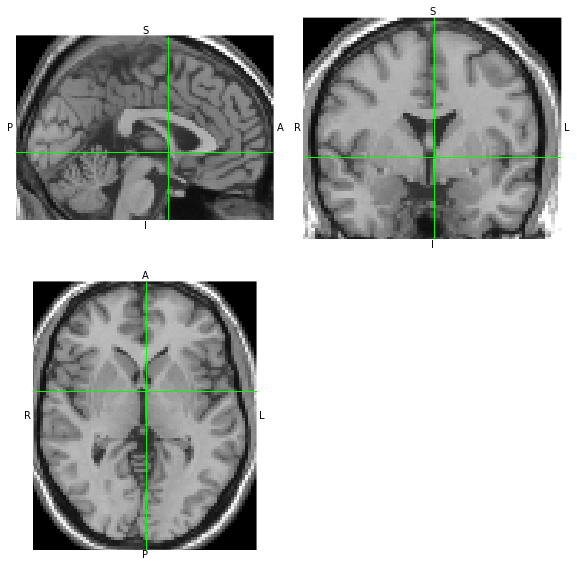

In [4]:
%matplotlib inline
im.orthoview()

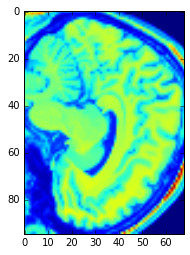

In [5]:
from matplotlib import pyplot as plt
import numpy as np
d_t1 = np.array(im.dataobj)
d2 = d_t1[35,:,:]
plt.imshow(d2)

<OrthoSlicer3D: /home/grg/upf/Data/RM/rch2_wm.nii (79, 95, 68)>

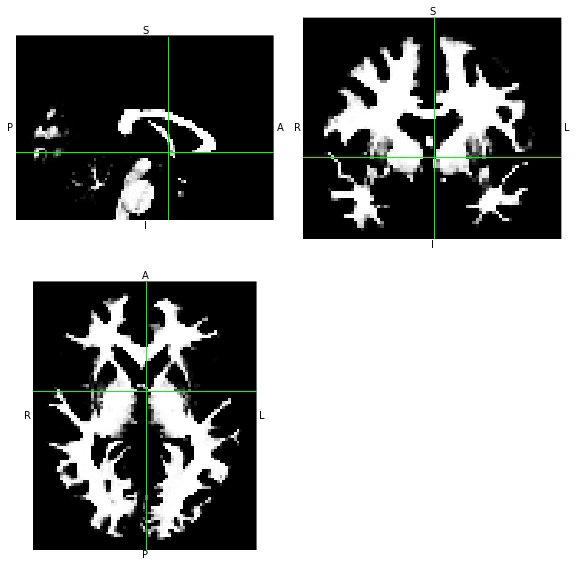

In [6]:
fp2 = '/home/grg/upf/Data/RM/rch2_wm.nii'
wm = nib.load(fp2)
d_wm = np.array(wm.dataobj)
wm.orthoview()

174.746


(array([  2724.,   9738.,  11344.,  11497.,  11250.,  11623.,   6368.,
          1982.,    310.,     37.]),
 array([  67.36786652,   95.21324844,  123.05863037,  150.9040123 ,
         178.74939423,  206.59477615,  234.44015808,  262.28554001,
         290.13092194,  317.97630386,  345.82168579]),
 <a list of 10 Patch objects>)

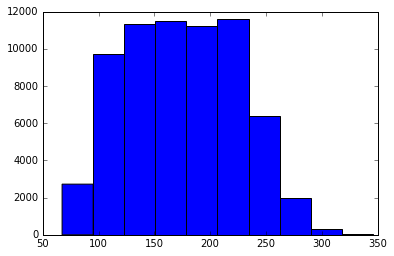

In [7]:
fp3 = '/home/grg/upf/Data/Control/norm2ROI2wscan001.nii'
im2 = nib.load(fp3)
#pet1.orthoview()
pet1 = np.array(im2.dataobj)
m = pet1[d_wm>0.8].mean()
print m
plt.hist(pet1[d_wm>0.8])

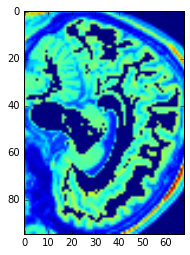

In [16]:
d_t1[d_wm>0.8] = 0
plt.imshow(d2) # d2 is the sagittal slice
#test = nib.Nifti1Image(d_t1, im.affine)
#test.to_filename('/tmp/test.nii.gz')

## Advanced visualization with nilearn

In [36]:
from nilearn import plotting

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


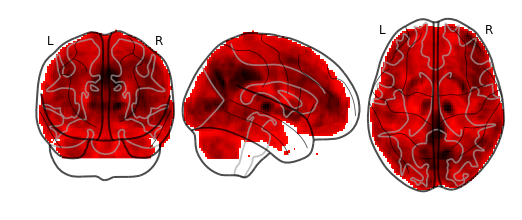

In [46]:
plotting.
plotting.plot_glass_brain(im) #, colorbar=True, title='PET exam', black_bg=True, threshold=260)

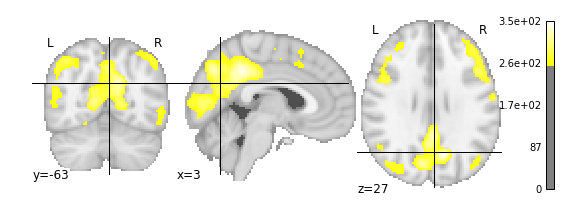

In [53]:
plotting.plot_stat_map(im2, bg_img=im, threshold=260)

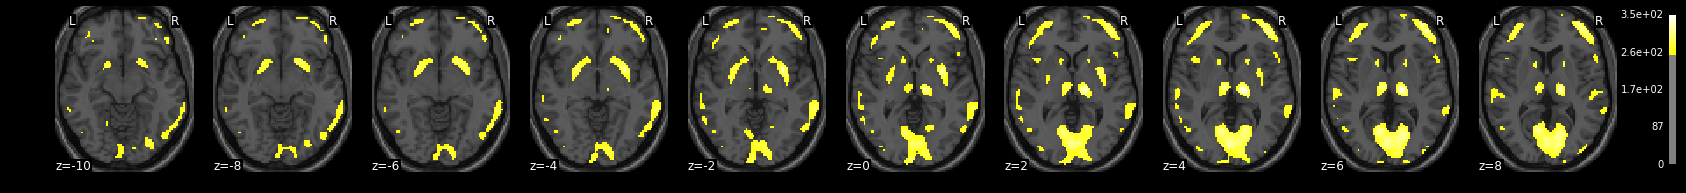

In [55]:
plotting.plot_stat_map(im2, bg_img=im, threshold=260, display_mode='z', cut_coords=range(-10,10,2))

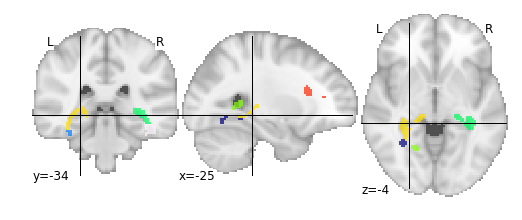

In [54]:
roi_fp = '/home/grg/spm/ROIapoE/ROI_DARTEL/csf5/rois.nii.gz'
plotting.plot_roi(roi_fp)


## Processing data with nilearn

In [19]:
from nilearn import image
image.

Check nilearn website

http://nilearn.github.io/modules/reference.html#module-nilearn.image

http://nilearn.github.io/auto_examples/04_manipulating_images/plot_roi_extraction.html#sphx-glr-auto-examples-04-manipulating-images-plot-roi-extraction-py

http://nilearn.github.io/auto_examples/04_manipulating_images/plot_extract_rois_statistical_maps.html#sphx-glr-auto-examples-04-manipulating-images-plot-extract-rois-statistical-maps-py

# Interfacing neuroimaging software

In [57]:
import nipype

Check nipype IPython notebooks